<a href="https://colab.research.google.com/github/Esaipriya/AISECT-ML/blob/main/HEART_DISEASE_PRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import sklearn
import numpy as np

In [2]:
dataset=pd.read_csv('/content/heart.csv')
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# **Heart Disease Dataset Column Details**

1.Age -Patient’s age in years.

2.Sex -M = Male, F = Female.

3.ChestPainType -TA = Typical Angina,
ATA = Atypical Angina, NAP = Non-Anginal Pain,ASY = Asymptomatic

4.RestingBP -Normal: 120 mmHg,
High: ≥140 mmHg

5.Cholesterol	-(in mg/dl),
Normal: <200,
Borderline: 200–239,

High: ≥240.

6.FastingBS- 0 = <120 mg/dl, 1 = ≥120 mg/dl

7.RestingECG- Normal = Normal ECG,ST = ST-T wave abnormality,LVH = Left Ventricular Hypertrophy

8.MaxHR -Highest heart rate, Typical Range: 60–202
9.ExerciseAngina- Y = Yes, N = No

10.Oldpeak-Measures change in ST segment on ECG after exercise. A higher value indicates heart stress

11.ST_Slope	= Up = normal response,
• Flat = moderate risk,
• Down = high risk of heart disease.

12.HeartDisease =  0 = No heart disease,
1 = Heart disease present

In [4]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
dataset.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [6]:
dataset.drop(['Sex'],axis=1,inplace=True)

In [7]:
display(dataset.head())

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
dataset['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'ChestPainType' column and convert to int
dataset['ChestPainType'] = label_encoder.fit_transform(dataset['ChestPainType']).astype(int)

# Display the updated dataframe with the new encoded column
display(dataset.tail())

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,3,110,264,0,Normal,132,N,1.2,Flat,1
914,68,0,144,193,1,Normal,141,N,3.4,Flat,1
915,57,0,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,1,130,236,0,LVH,174,N,0.0,Flat,1
917,38,2,138,175,0,Normal,173,N,0.0,Up,0


In [10]:
dataset['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [11]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'ChestPainType' column and convert to int
dataset['RestingECG'] = label_encoder.fit_transform(dataset['RestingECG']).astype(int)

# Display the updated dataframe with the new encoded column
display(dataset.head())

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,140,289,0,1,172,N,0.0,Up,0
1,49,2,160,180,0,1,156,N,1.0,Flat,1
2,37,1,130,283,0,2,98,N,0.0,Up,0
3,48,0,138,214,0,1,108,Y,1.5,Flat,1
4,54,2,150,195,0,1,122,N,0.0,Up,0


In [12]:
dataset['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [13]:
# Apply one-hot encoding to categorical column
dataset = pd.get_dummies(dataset, columns=["ExerciseAngina"], drop_first=True,dtype=int)

# Display the first few rows of the encoded dataset
display(dataset.head())

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,ExerciseAngina_Y
0,40,1,140,289,0,1,172,0.0,Up,0,0
1,49,2,160,180,0,1,156,1.0,Flat,1,0
2,37,1,130,283,0,2,98,0.0,Up,0,0
3,48,0,138,214,0,1,108,1.5,Flat,1,1
4,54,2,150,195,0,1,122,0.0,Up,0,0


In [14]:
dataset['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [15]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'ChestPainType' column and convert to int
dataset['ST_Slope'] = label_encoder.fit_transform(dataset['ST_Slope']).astype(int)

# Display the updated dataframe with the new encoded column
display(dataset.head())

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,ExerciseAngina_Y
0,40,1,140,289,0,1,172,0.0,2,0,0
1,49,2,160,180,0,1,156,1.0,1,1,0
2,37,1,130,283,0,2,98,0.0,2,0,0
3,48,0,138,214,0,1,108,1.5,1,1,1
4,54,2,150,195,0,1,122,0.0,2,0,0


The Dataset after done a encode

In [16]:
dataset

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,ExerciseAngina_Y
0,40,1,140,289,0,1,172,0.0,2,0,0
1,49,2,160,180,0,1,156,1.0,1,1,0
2,37,1,130,283,0,2,98,0.0,2,0,0
3,48,0,138,214,0,1,108,1.5,1,1,1
4,54,2,150,195,0,1,122,0.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,3,110,264,0,1,132,1.2,1,1,0
914,68,0,144,193,1,1,141,3.4,1,1,0
915,57,0,130,131,0,1,115,1.2,1,1,1
916,57,1,130,236,0,0,174,0.0,1,1,0


In [17]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = dataset[['Age','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','Oldpeak','ST_Slope','ExerciseAngina_Y']]
y = dataset['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (734, 10)
Shape of X_test: (184, 10)
Shape of y_train: (734,)
Shape of y_test: (184,)


RANDOM FOREST


In [25]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
rfc1=RandomForestClassifier(n_estimators=100)
rfc1.fit(X_train,y_train)
print(confusion_matrix(y_test,rfc1.predict(X_test)))
print(classification_report(y_test,rfc1.predict(X_test)))
rf_acc=accuracy_score(y_test,rfc1.predict(X_test))
print(rf_acc)

[[69  8]
 [15 92]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        77
           1       0.92      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

0.875


SUPPORT VECTOR MACHINE

In [26]:
from sklearn.svm import SVC
svc1=SVC()
svc1.fit(X_train,y_train)
print(confusion_matrix(y_test,svc1.predict(X_test)))
print(classification_report(y_test,svc1.predict(X_test)))
svc_acc=accuracy_score(y_test,svc1.predict(X_test))
print(svc_acc)

[[54 23]
 [35 72]]
              precision    recall  f1-score   support

           0       0.61      0.70      0.65        77
           1       0.76      0.67      0.71       107

    accuracy                           0.68       184
   macro avg       0.68      0.69      0.68       184
weighted avg       0.69      0.68      0.69       184

0.6847826086956522


XGBOOST CLASSIFIER

In [27]:
import xgboost as xgb
# Initialize and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)
print(confusion_matrix(y_test,xgb_model.predict(X_test)))
print(classification_report(y_test,xgb_model.predict(X_test)))
xgb_acc=accuracy_score(y_test,xgb_model.predict(X_test))
print(xgb_acc)

[[70  7]
 [19 88]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.84        77
           1       0.93      0.82      0.87       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

0.8586956521739131


LOGISITIC REGRESSION

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.83
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.80        77
           1       0.89      0.80      0.84       107

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

/tmp/ipython-input-559486756.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')


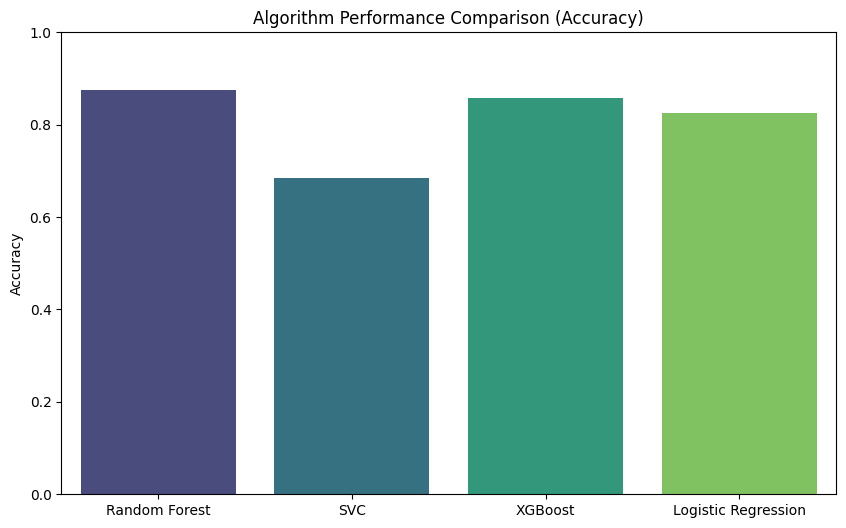

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
model_names = ['Random Forest', 'SVC', 'XGBoost', 'Logistic Regression']
accuracy_scores = [rf_acc, svc_acc, xgb_acc, lr_accuracy]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.title('Algorithm Performance Comparison (Accuracy)')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.show()

In [29]:
# Initialize and train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


In [32]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [33]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [35]:
import pickle
filename="RandomForest.sav"
pickle.dump(model,open(filename,"wb"))

In [36]:
load_model=pickle.load(open("/content/RandomForest.sav","rb"))

In [38]:
result=load_model.predict([[37,130,283,0,98,0.0,1,2,0,2]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




result
0=No,
1=Yes



In [39]:
result

array([1])